In [80]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

# Import the tfidf vectorizer to quantify the significance of words within and across documents
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the PassiveAggressiveClassifier as the model to classify news later
from sklearn.linear_model import PassiveAggressiveClassifier

# We will also import seaborn and matplot to visualise accuracy
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# ls for file-name references
!ls

PassiveAggressive Modelling.ipynb ger_news_clean.csv
complete_news_clean.csv           test_bilingual.csv
eng_news_clean.csv


### Model with English articles only

In [82]:
# For an unexplicable reason the converted .csv file was giving back an error in tokenizing the data
# So, we choose to declare the engine as python and 
english_news = pd.read_csv('eng_news_clean.csv',engine = 'python',error_bad_lines=False)

In [83]:
# The error seems to have been stemming from content & label, since now some rows null values
# That is not a big issue at this point, since we do not need the title column
english_news = english_news.dropna()

In [84]:
english_news = english_news.reset_index(drop=True)

In [85]:
# We convert our boleean values into actual labels

label_converter = {1:'Real',0:'Fake'}

english_news = english_news.replace({'label' : label_converter})

In [86]:
# We will only use article content as the input
# The reason here is that the passiveaggressive classifier won't be able to handle 2 inputs

X = english_news['content']

In [87]:
X.shape

(44898,)

In [88]:
y = english_news['label']

In [89]:
y.shape

(44898,)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [91]:
# We are not selecting stop words, since those have been cleaned out already
# max_df denotes a threshold of 95% for word occurrences
# I put it fairly high since I removed stop words with NLTK before, but still want to safeguard about some that are missed
# So words that occur in more than 95% of documents (or articles)

tfidf = TfidfVectorizer(max_df = 0.95)

In [92]:
# Fit the data into the model to learn the vocabulary
# Transform the test data to see if the vocabulary we built works fine
# We use "astype('U')" to convert the input into unicode before encoding it
# This is probably not so relevant for the English dataset
# On the other hand the German alphabet has special characters lik Ü and Ä, so it'll be useful there

tfidf_train =tfidf.fit_transform(X_train.astype('U')) 
tfidf_test =tfidf.transform(X_test.astype('U'))

In [93]:
# Fitting the data into a passiveaggressiveclassifier
# I sticked to 50 iterations, since the default is 1000 and there is no real gain in having more of them (see below)

model = PassiveAggressiveClassifier(max_iter = 50, shuffle = True)

model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [94]:
# We test the model and print the accuracy score

y_pred = model.predict(tfidf_test)

score = accuracy_score(y_test,y_pred)

print('Accuracy: ' + str(round(score*100,2)) + '%')

Accuracy: 99.54%


In [95]:
# We take a look at the results in a confusion matrix

confusion_matrix(y_test,y_pred, labels=['Fake','Real'])

array([[4658,   19],
       [  22, 4281]])

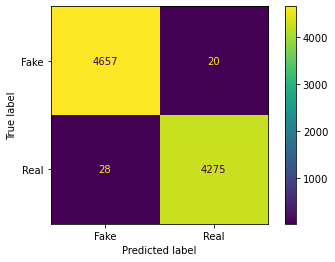

In [96]:
classification = model.fit(tfidf_train,y_train)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classification, tfidf_test, y_test)
plt.show();

In [97]:
# For an additional check we look at the accuracy of the model depending on the iterations we choose
# There is some degree of variability, so basically results change within a given threshold
# Since there is no significant gain from it, we'll stick with 50 iterations

iterations = range(50, 1500, 50)

In [98]:
scores = []

for iteration in iterations:
    model = PassiveAggressiveClassifier(max_iter = iteration, shuffle = True)
    model.fit(tfidf_train,y_train)
    y_pred = model.predict(tfidf_test)
    score = accuracy_score(y_test,y_pred)
    scores.append(score)

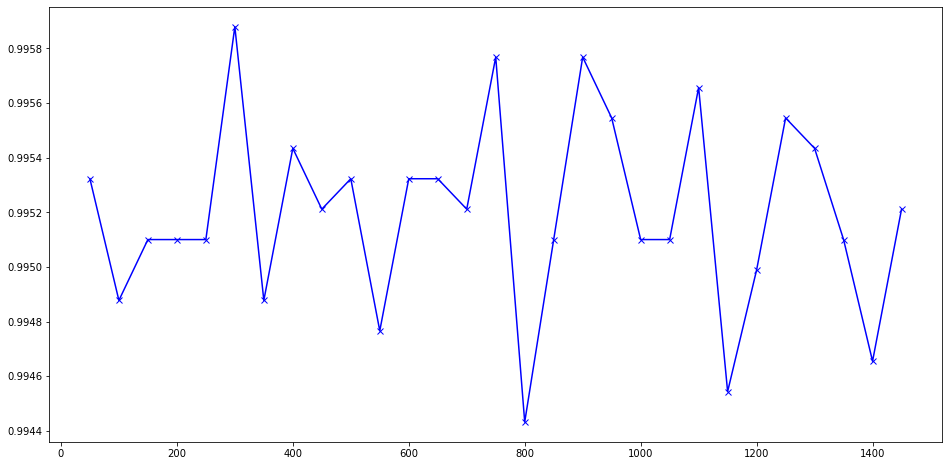

In [99]:
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(iterations, scores, 'bx-');

### Model with German articles only

We essentially repeat the same steps for the German dataset
(Should have been more diligent with the labelling during data cleaning), but thank good there are dictionaries.

In [100]:
german_news = pd.read_csv('ger_news_clean.csv')

In [101]:
german_news.head()

,titles,content,label
0,Corona-Pandemie: Christine Lambrecht (SPD) spr...,"Bundesinnenminister Horst Seehofer (CSU), Bund...",Real
1,"Unwetter Sachsen, Bayern Berlin: 67-Jähriger s...",Überflutete Straße bayerischen Penzberg Starkr...,Real
2,Olympia 2021: Triathlon Männer beginnt kuriose...,Panne Olympia: Teil Triathleten wurde Boot bei...,Real
3,Galeria Karstadt Kaufhof kündigt Neustart einh...,Filiale Galeria Kaufhof Köln Reihenweise Filia...,Real
4,Olympia heute – Tag drei: Nacht geschah Tag br...,Sideris Tasiadis peilt Medaille Fehlstart beim...,Real


In [102]:
label_converter = {True:'Real', False:'Fake'}

In [103]:
german_news = german_news.replace({'label' : label_converter})

In [104]:
german_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   titles   3517 non-null   object
 1   content  3517 non-null   object
 2   label    3517 non-null   object
dtypes: object(3)
memory usage: 82.6+ KB


In [105]:
X = german_news['content']

In [106]:
y = german_news['label']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [108]:
tfidf_train = tfidf.fit_transform(X_train.astype('U')) 
tfidf_test = tfidf.transform(X_test.astype('U'))

In [109]:
model = PassiveAggressiveClassifier(max_iter = 50)

model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [110]:
y_pred = model.predict(tfidf_test)

score = accuracy_score(y_test,y_pred)

print('Accuracy: ' + str(round(score*100,2)) + '%')

Accuracy: 99.01%


In [111]:
confusion_matrix(y_test,y_pred, labels=['Fake','Real'])

array([[323,   3],
       [  4, 374]])

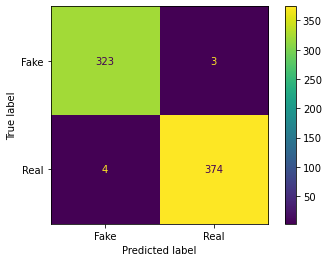

In [112]:
classification = model.fit(tfidf_train,y_train)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classification, tfidf_test, y_test)
plt.show();

### Run the model for 2 languages at once

Now we will feed the model our complete data set to make it bilingual. ;)
This is the final model we want to use for the actual tool.

In [113]:
complete_news = pd.read_csv('complete_news_clean.csv')

In [114]:
complete_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48415 entries, 0 to 48414
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48415 non-null  object
 1   label    48415 non-null  object
dtypes: object(2)
memory usage: 756.6+ KB


In [115]:
complete_news['label'].value_counts()

Fake    25133
Real    23282
Name: label, dtype: int64

In [116]:
label_converter = {1:'Real', 0:'Fake'}

complete_news = complete_news.replace({'label' : label_converter})

In [117]:
X = complete_news['content']

In [118]:
X.shape

(48415,)

In [119]:
y = complete_news['label']

In [120]:
y.shape

(48415,)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [122]:
tfidf_train = tfidf.fit_transform(X_train.astype('U')) 

tfidf_test = tfidf.transform(X_test.astype('U'))

In [123]:
model = PassiveAggressiveClassifier(max_iter = 150, shuffle = True)

model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=150)

In [124]:
y_pred = model.predict(tfidf_test)

score = accuracy_score(y_test, y_pred)

print('Accuracy: ' + str(round(score*100,2)) + '%')

Accuracy: 99.26%


In [125]:
confusion_matrix(y_test,y_pred, labels=['Fake','Real'])

array([[7474,   46],
       [  61, 6944]])

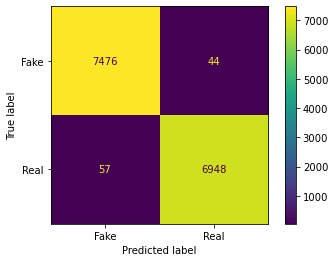

In [126]:
classification = model.fit(tfidf_train,y_train)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classification, tfidf_test, y_test)
plt.show();

### Final test with random data

Now we run a final test with a independent and mixed data set, partially from Kaggle, partially from our own scraping efforts.

In [127]:
test = pd.read_csv('test_bilingual.csv')

In [128]:
test.head()

,title,content,label
0,Kleine Hufeisennase Rückkehr Kanton Luzern: We...,Seit 1988 konnte Kleinen Hufeisennase Kolonie ...,Real
1,Zerstörter Salat verfaulte Kirschen: Lage Land...,Die ausserordentlichen Regenfälle führen Engpa...,Real
2,"Stefan Küng verpasst 0,40 Sekunden Bronze sagt...",Der Medaillentraum Stefan Küng platzt Zeitfahr...,Real
3,Boom fahrenden Hotelzimmer: Luzerner Wohnmobil...,"Flugreisen immer unsicher, Quarantäneregeln än...",Real
4,Nächster Knall! Alex Wilson verpasst Olympisch...,Nach Kariem Hussein verpasst Alex Wilson weite...,Real


In [129]:
test = test[['content', 'label']]
test.head()

,content,label
0,Seit 1988 konnte Kleinen Hufeisennase Kolonie ...,Real
1,Die ausserordentlichen Regenfälle führen Engpa...,Real
2,Der Medaillentraum Stefan Küng platzt Zeitfahr...,Real
3,"Flugreisen immer unsicher, Quarantäneregeln än...",Real
4,Nach Kariem Hussein verpasst Alex Wilson weite...,Real


In [130]:
label_converter = {True:'Real', False:'Fake'}

test = test.replace({'label' : label_converter})

In [131]:
test.head()

,content,label
0,Seit 1988 konnte Kleinen Hufeisennase Kolonie ...,Real
1,Die ausserordentlichen Regenfälle führen Engpa...,Real
2,Der Medaillentraum Stefan Küng platzt Zeitfahr...,Real
3,"Flugreisen immer unsicher, Quarantäneregeln än...",Real
4,Nach Kariem Hussein verpasst Alex Wilson weite...,Real


In [132]:
X_test = test['content']

In [133]:
X_test.shape

(4230,)

In [134]:
y_test = test['label']

In [135]:
y_test.shape

(4230,)

In [136]:
tfidf_test = tfidf.transform(X_test.astype('U'))

In [137]:
y_pred = model.predict(tfidf_test)

score = accuracy_score(y_test, y_pred)

print('Accuracy: ' + str(round(score*100,2)) + '%')

Accuracy: 71.75%


So, the accuracy actually drops over 20% for an independent data set, but nonetheless we still have quite a strong score with 71.37%.

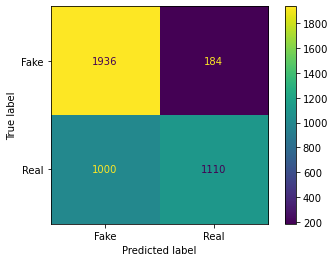

In [138]:
classification = model.fit(tfidf_train,y_train)

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classification, tfidf_test, y_test)
plt.show();

### Just for interest - Quick trial with logistics regression for the complete data set

In [139]:
complete_news = pd.read_csv('complete_news_clean.csv')

In [140]:
label_converter = {'Real':1,'Fake':0}

complete_news = complete_news.replace({'label' : label_converter})

In [141]:
X = complete_news['content']

In [142]:
y = complete_news['label']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [144]:
tfidf = TfidfVectorizer(max_df = 0.95)

In [145]:
tfidf_train =tfidf.fit_transform(X_train.astype('U')) 
tfidf_test =tfidf.transform(X_test.astype('U'))

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
clf = LogisticRegression(random_state=0).fit(tfidf_train, y_train)

In [148]:
probabilities = clf.predict_proba(tfidf_test)
preds = probabilities[:,1]
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Accuracy: ' + str(round(roc_auc*100,2)) + '%')

Accuracy: 99.82%


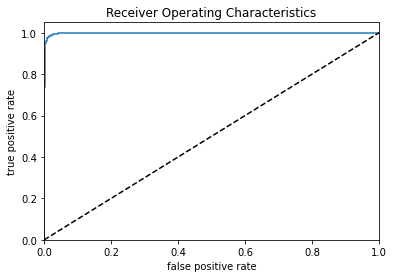

In [149]:
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr, label = 'AUC'%roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

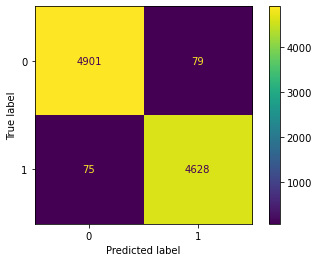

In [150]:
predictions = clf.predict(tfidf_test)

accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions)
plot_confusion_matrix(clf, tfidf_test, y_test)
plt.show();

### Independent data testing

It turns out that with logisitcs regresssion the accuracy would have actually been higher, potentially because the passiveaggresive model would have needed more data to learn. It was a bit naive, but I did not expect a regression to perform better than a learning model. Bottom line: logistics regressions was better to correctly identify fake news.

It's just an assumption, but probably the passiveaggressive model is still more capable of learning more accuracy in the future, if set up correctly.

Definitely note to myself to plan in more time to do more of this kind of testing in later projects.

In [151]:
test = pd.read_csv('test_bilingual.csv')

In [152]:
test = test[['content', 'label']]
test.head()

,content,label
0,Seit 1988 konnte Kleinen Hufeisennase Kolonie ...,Real
1,Die ausserordentlichen Regenfälle führen Engpa...,Real
2,Der Medaillentraum Stefan Küng platzt Zeitfahr...,Real
3,"Flugreisen immer unsicher, Quarantäneregeln än...",Real
4,Nach Kariem Hussein verpasst Alex Wilson weite...,Real


In [153]:
label_converter = {'Real':1,'Fake':0}

test = test.replace({'label' : label_converter})

In [154]:
X_test = test['content']

In [155]:
y_test = test['label']

In [156]:
tfidf_test = tfidf.transform(X_test.astype('U'))

In [157]:
probabilities = clf.predict_proba(tfidf_test)
preds = probabilities[:,1]
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print('Accuracy: ' + str(round(roc_auc*100,2)) + '%')

Accuracy: 85.5%


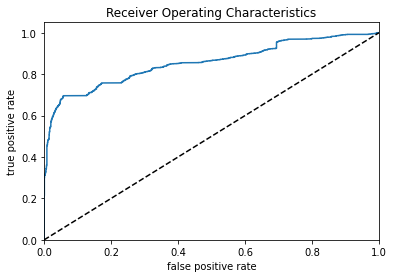

In [158]:
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr, label = 'AUC'%roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

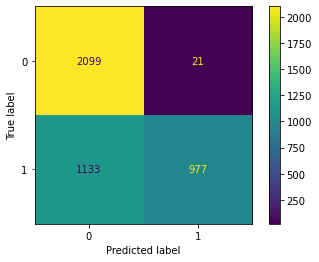

In [159]:
predictions = clf.predict(tfidf_test)

accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions)
plot_confusion_matrix(clf, tfidf_test, y_test)
plt.show();